# I. Introduction

This exercise investigates factorial calculation times using iteration (a for-loop) and recursion.  

First we import helpful packages.

In [1]:
import sys
import random 
import time
import pandas as pd
#import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# II. Defining the Factorial Functions

Next I leveraged the base code from our course materials

In [2]:
# the recursive version
def fact_rec(x):
  if x == 1:
    return 1
  else:
    return x * fact_rec(x-1)

In [3]:
# the iterative version
def fact_iter(x):
    ans = 1
    for i in range(1,x+1): 
        ans = ans * i 
    return ans

A quick test to make sure both functions are working properly

In [5]:
print(fact_rec(5))
print(fact_iter(5))

120
120


All good!

# III. Generating the Test Data

I decided to increase the upper integer limit of the test data to (TRY to) show greater time differences.

First I checked the python recursion limit on my machine to see what my upper limit could be.

In [7]:
sys.getrecursionlimit()

3000

Though not necessary, I also sorted the test data to make it easier to spot check the subsequent time test results

In [10]:
# Change this if your recursion limit is less than 3000!
upper_limit = 2900

random.seed(5)
test_data = [random.randint(100, upper_limit) for _ in range(10)]
test_data.sort()
test_data

[218, 312, 1120, 1146, 1568, 2007, 2271, 2651, 2758, 2770]

# IV. Factorial Calculation Time Testing

To generate the time results, I created a function that takes 2 arguments:
1. the chosen factorial function to test
2. the time function to use to capture the run time of the chosen factorial function

The time test function returns 2 lists:
1. the factorial results for each integer value in the test data (to validate against the other function's output)
1. the time test results for each corresponding run of the chosen factorial function

In [11]:
def test_loop(fact_function,time_function):
    fact_results = []
    time_results = []
    for test_int in test_data:
        start = time_function()
        fact = fact_function(test_int)
        end = time_function()
        fact_results.append(fact)
        # time results are converted to ms (from seconds)
        time_results.append((end - start)*1000)
    return fact_results, time_results

Over the course of the last (first) three mini-programming assignments, I've had tremendous difficulty trying to reproduce the expected 'Big O' results.  After debunking the hypothesis that there were code issues with factorial, test data generation, or time testing functions, I've narrowed my hypothesis regarding the unexpected time results to an issue with my computer specs/system configuration.

As a result, I decided to run the time testing with 5 different time capture functions from the time package to try to generate the proper expected results and/or further discern why my time test results look... whacky.

### VERSION 1: Uses regular time.time() function

In [12]:
recur_fact_results_vtime, recur_time_results_vtime = test_loop(fact_rec, time.time)
iter_fact_results_vtime, iter_time_results_vtime = test_loop(fact_iter, time.time)

Examining the version 1, time.time() results

In [13]:
print(recur_fact_results_vtime == iter_fact_results_vtime)
print(recur_time_results_vtime)
print(iter_time_results_vtime)

True
[0.0, 0.0, 50.090789794921875, 0.0, 4.370450973510742, 2.8116703033447266, 0.0, 9.149312973022461, 6.649255752563477, 3.777027130126953]
[0.0, 0.0, 8.086919784545898, 0.0, 2.9900074005126953, 1.4882087707519531, 1.9893646240234375, 2.042531967163086, 2.629518508911133, 2.0656585693359375]


### VERSION 2: Uses time.thread_time() function

In [14]:
recur_fact_results_vthread, recur_time_results_vthread = test_loop(fact_rec, time.thread_time)
iter_fact_results_vthread, iter_time_results_vthread = test_loop(fact_iter, time.thread_time)

Examining the version 2, time.thread_time() results

In [15]:
print(recur_fact_results_vthread == iter_fact_results_vthread)
print(recur_time_results_vthread)
print(iter_time_results_vthread)

True
[0.0, 0.0, 0.0, 0.0, 0.0, 15.625, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.625, 0.0, 0.0, 0.0]


### VERSION 3: Uses time.monotonic() function

In [16]:
recur_fact_results_vmonotonic, recur_time_results_vmonotonic = test_loop(fact_rec, time.monotonic)
iter_fact_results_vmonotonic, iter_time_results_vmonotonic = test_loop(fact_iter, time.monotonic)

Examining the version 3, time.monotonic() results

In [17]:
print(recur_fact_results_vmonotonic == iter_fact_results_vmonotonic)
print(recur_time_results_vmonotonic)
print(iter_time_results_vmonotonic)

True
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.00000006146729, 0.0, 14.999999897554517]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.00000006146729, 0.0]


### VERSION 4: Uses time.process_time() function

In [18]:
recur_fact_results_vprocess, recur_time_results_vprocess = test_loop(fact_rec, time.process_time)
iter_fact_results_vprocess, iter_time_results_vprocess = test_loop(fact_iter, time.process_time)

Examining the version 4, time.process_time() results

In [19]:
print(recur_fact_results_vprocess == iter_fact_results_vprocess)
print(recur_time_results_vprocess)
print(iter_time_results_vprocess)

True
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.625, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.625, 0.0, 0.0]


### VERSION 5: Uses time.perf_counter() function

In [20]:
recur_fact_results_vperfCounter, recur_time_results_vperfCounter = test_loop(fact_rec, time.perf_counter)
iter_fact_results_vperfCounter, iter_time_results_vperfCounter = test_loop(fact_iter, time.perf_counter)

Examining the version 5, time.perf_counter() results

In [23]:
print(recur_fact_results_vperfCounter == iter_fact_results_vperfCounter)
print(recur_time_results_vperfCounter)
print(iter_time_results_vperfCounter)

True
[0.11840000001939188, 0.16820000018924475, 1.490799999828596, 0.7060999998884654, 2.062699999896722, 3.21669999993901, 4.061599999886312, 2.9664999999567954, 2.9465000000072905, 3.433999999970183]
[0.026800000114235445, 0.04179999996267725, 0.37849999989703065, 0.3560000000106811, 0.7793999998284562, 1.097399999935078, 1.267500000039945, 1.4887999998336454, 1.8671999998787214, 1.8070999999508786]


Now to confirm that the factorial all results match...  

Since for each time function test the iteratively generated factorials were equal to the recursion generated factorials, via the transitive property of equality, if all the recursion generated factorials equal each other, then all the generated factorials across the various factorial _*AND*_ time functions equal each other.

In [26]:
recur_fact_results_vtime == recur_fact_results_vthread == recur_fact_results_vmonotonic == recur_fact_results_vprocess == recur_fact_results_vperfCounter

True

# V. Results Organization and Exploration

Results are organized into a dataframe capturing...
* the test integer
* the factorial result (can be pulled from any of the factorial results captured)
* the time test results for each unique combination of factorial function (2) and time test function (5), resulting in 10 time results columns

In [29]:
results_dict = {'Input_Number':test_data
                ,'Factorial_Results':iter_fact_results_vtime
                ,'ForLoop_TimeFunction_Time':iter_time_results_vtime
                ,'Recursion_TimeFunction_Time':recur_time_results_vtime
                ,'ForLoop_ThreadFunction_Time':iter_time_results_vthread
                ,'Recursion_ThreadFunction_Time':recur_time_results_vthread
                ,'ForLoop_MonotonicFunction_Time':iter_time_results_vmonotonic
                ,'Recursion_MonotonicFunction_Time':recur_time_results_vmonotonic
                ,'ForLoop_ProcessFunction_Time':iter_time_results_vprocess
                ,'Recursion_ProcessFunction_Time':recur_time_results_vprocess
                ,'ForLoop_PerfCounterFunction_Time':iter_time_results_vperfCounter
                ,'Recursion_PerfCounterFunction_Time':recur_time_results_vperfCounter}

results = pd.DataFrame(results_dict, dtype=object)

Next we begin to graph the results looking at scatterplots of the data from each time function on its own.

To do this, I created a custom plotting function that takes the 2 column names from our results dataframe to plot on the y-axis, and the name of the time function used for labeling purposes.

In [35]:
def my_custom_plot(ycol1,ycol2,time_func):
    sns.set()
    ax1 = sns.scatterplot(x="Input_Number", y=ycol1
                            ,data=results
                            ,color='b', marker='o', s=50
                            ,label = ' '.join(['for-loop', time_func, 'results']))
    sns.scatterplot(x="Input_Number", y=ycol2
                    ,data=results, ax=ax1
                    ,color='r', marker='x', s=55
                    ,label = ' '.join(['recursion', time_func, 'results']))
    ax1.set_xlabel('Input_Number')
    ax1.set_ylabel('Time in ms')
    ax1.set_title('Run Times for Factorial Calculation Functions')
    #ax1.legend(loc='upper left',fontsize='x-small')
    ax1.legend(bbox_to_anchor=(.45, .85) ,fontsize='x-small')

And now, to generate the 5 plots, one for each time function...

#### VERSION 1 Results, Using regular time.time() function

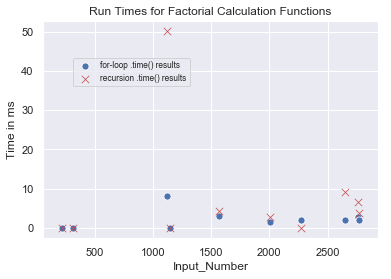

In [36]:
my_custom_plot("ForLoop_TimeFunction_Time","Recursion_TimeFunction_Time",'.time()')

#### VERSION 2: Uses time.thread_time() function

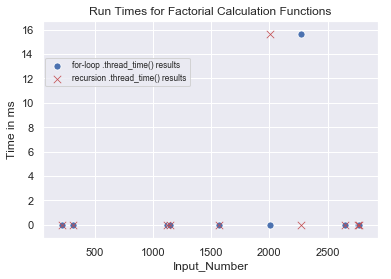

In [37]:
my_custom_plot("ForLoop_ThreadFunction_Time","Recursion_ThreadFunction_Time",'.thread_time()')

#### VERSION 3: Uses time.monotonic() function

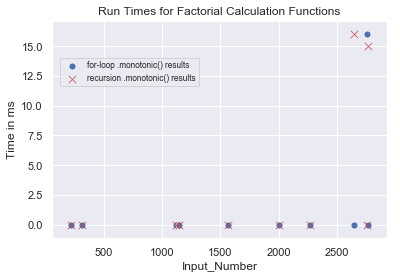

In [38]:
my_custom_plot("ForLoop_MonotonicFunction_Time","Recursion_MonotonicFunction_Time",'.monotonic()')

#### VERSION 4: Uses time.process_time() function

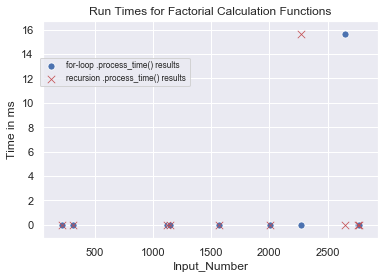

In [39]:
my_custom_plot("ForLoop_ProcessFunction_Time","Recursion_ProcessFunction_Time",'.process_time()')

#### VERSION 5: Uses time.perf_counter() function

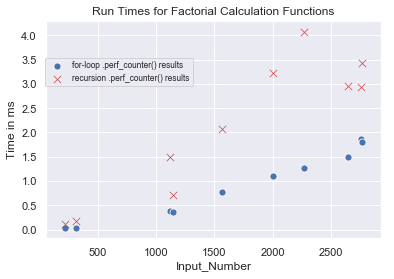

In [40]:
my_custom_plot("ForLoop_PerfCounterFunction_Time","Recursion_PerfCounterFunction_Time",'.perf_counter()')

# V. Results Discussion & Executive Summary

Prepare an executive summary of your results, referring to the table and figures you have generated. Explain how your results relate to big O notation. Describe your results in language that management can understand. This summary should be included as text paragraphs in the Jupyter notebook. Explain how the algorithm works and why it is a useful to data engineers.

# VI. Extra Credit!

The follow function is still a recursive factorial calculation function but it allows input numbers greater python's existing recursion limit by splitting the factorial multiplication in halfs, somewhat similar to binary search.  Now the function creates and exits stacks before it moves to the next multiplication component.  

Based on some preliminary research, this may be called 'Binary Splitting'?

In [43]:
def fact_semi_rec(u,l=1):
    if u==l:
        return u
    else:
        m = (u + l)//2
        first_half = fact_semi_rec(u,m+1)
        second_half = fact_semi_rec(m,l)
        return first_half * second_half

And now to test the function for accuracy...

In [44]:
fact_semi_rec(5)

120

And now to test that function computes and doesn't throw an error like the original recursive function when input values greater than python's existing recursion limit...

In [46]:
fact_rec(sys.getrecursionlimit()*2)

RecursionError: maximum recursion depth exceeded in comparison

The original recursive factorial function throws an error with values greater than the recursion limit.

In [ ]:
fact_semi_rec(sys.getrecursionlimit()*2)

But the new recursive factorial function works!!!